# Курс "Глубокое обучение в компьютерном зрении"

## Задание 1.

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
#!pip install imageio

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [3]:
image_path = 'puppy.jpg'

In [4]:
img = imageio.imread(image_path)
img = img.astype(np.float32) / 255.
print(img.shape)

(1707, 2560, 3)


C:\Users\Mikhail\AppData\Local\Temp\ipykernel_7428\979793315.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


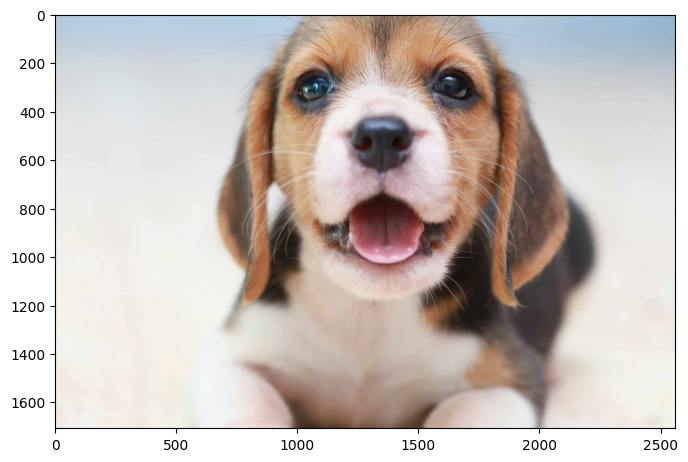

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Изменение яркости

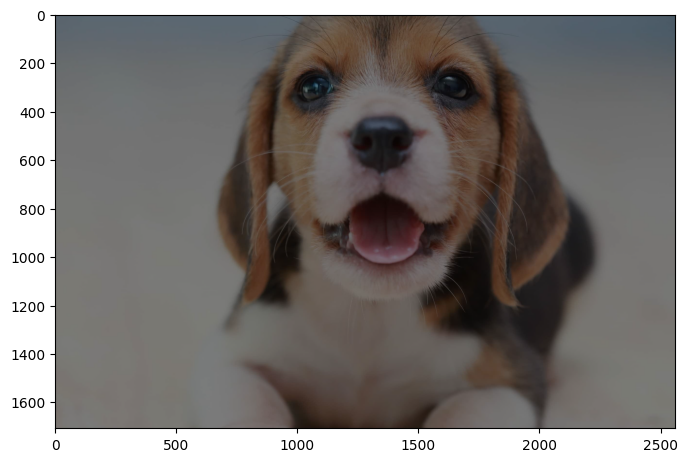

In [6]:
# уменьшение линейное
plt.figure(figsize=(8,8))
plt.imshow(img/2)

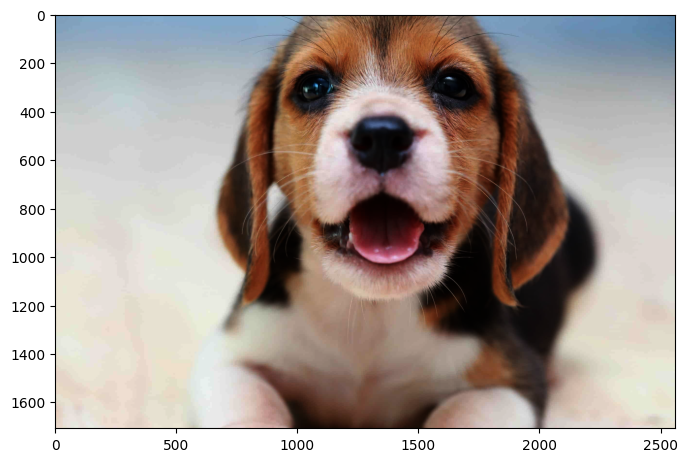

In [7]:
# уменьшение нелинейное
plt.figure(figsize=(8,8))
plt.imshow(img**2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


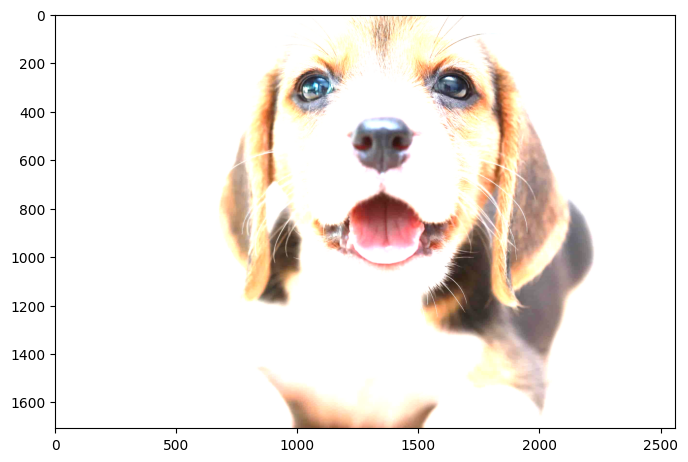

In [8]:
# увеличение линейное
plt.figure(figsize=(8,8))
plt.imshow(img*2)

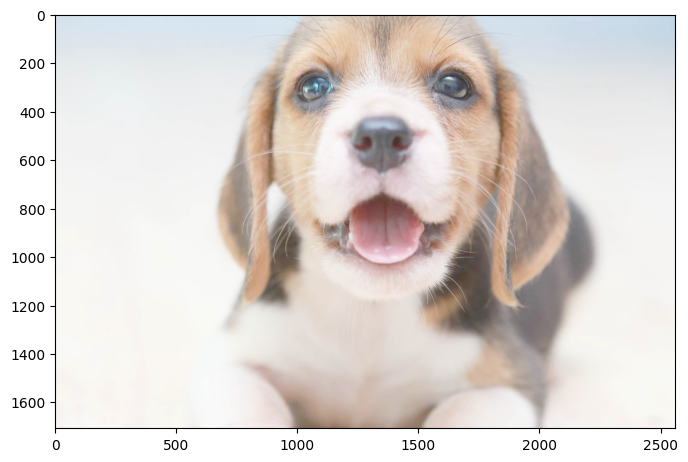

In [9]:
# нелинейное увеличение
plt.figure(figsize=(8,8))
plt.imshow(img**.5)

## Получение ЧБ изображения по цветному

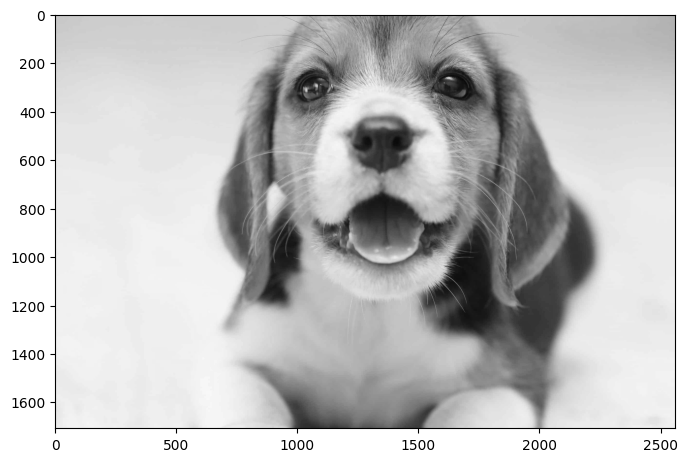

In [ ]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(8,8))
plt.imshow(img_bw, cmap='gray')

# Перевод в другое пространство

In [11]:
!pip install scikit-image

In [12]:
from skimage.color import rgb2hsv, hsv2rgb

In [13]:
img_hsv = rgb2hsv(img)
img_hsv[:5, :5, :]

array([[[0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824]],

       [[0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824]],

       [[0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824]],

       [[0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.20270269, 0.87058824]],

       [[0.5740741 , 0.20270269, 0.87058824],
        [0.5740741 , 0.202

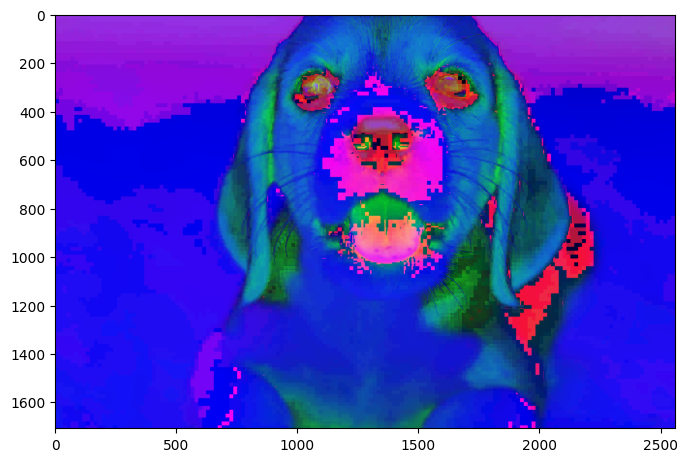

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(img_hsv)

## Уменьшение насыщенности

In [15]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 4
img_new = hsv2rgb(img_hsv_new)

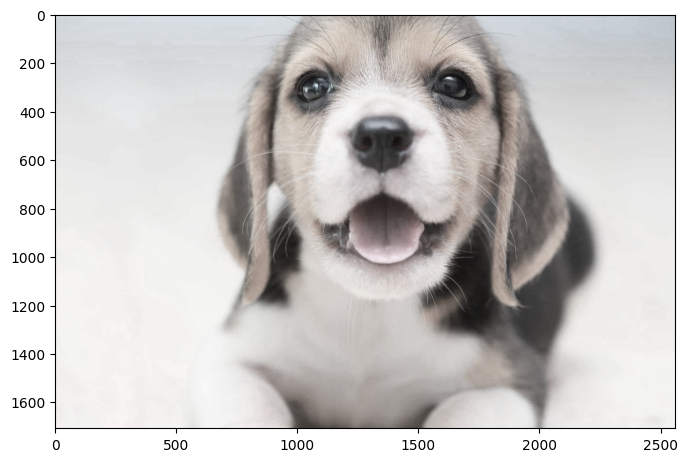

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Box blur

In [17]:
# Функция для прохождения маской по изображению

def img_proccess(img, w):

    out_img = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
        img.shape[1] - w.shape[1] + 1,
        3,), 
        dtype=np.float32)

    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = img[i:i+w.shape[0], j:j+w.shape[1]]

            out_img[i,j,0] = np.sum(w * x[:,:,0])
            out_img[i,j,1] = np.sum(w * x[:,:,1])
            out_img[i,j,2] = np.sum(w * x[:,:,2])

    return out_img

In [18]:
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w = w / np.sum(w)

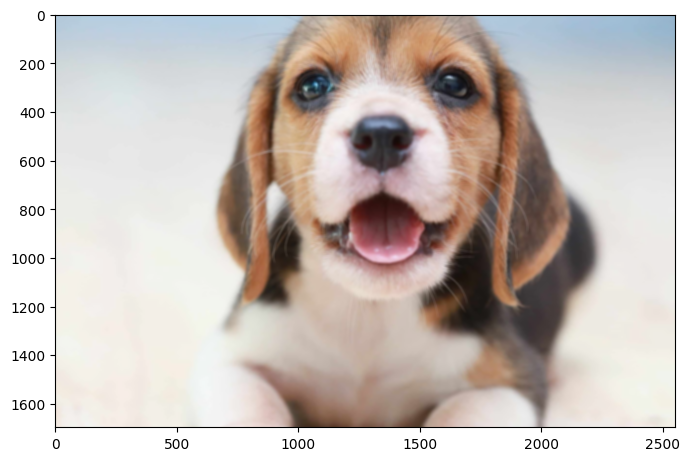

In [19]:
out_img = img_proccess(img, w)
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

## Gaussian blur

In [20]:
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

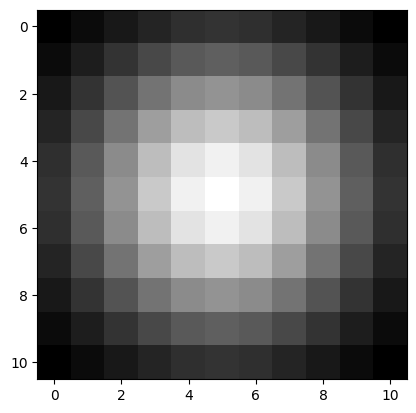

In [21]:
plt.imshow(w, cmap='gray')

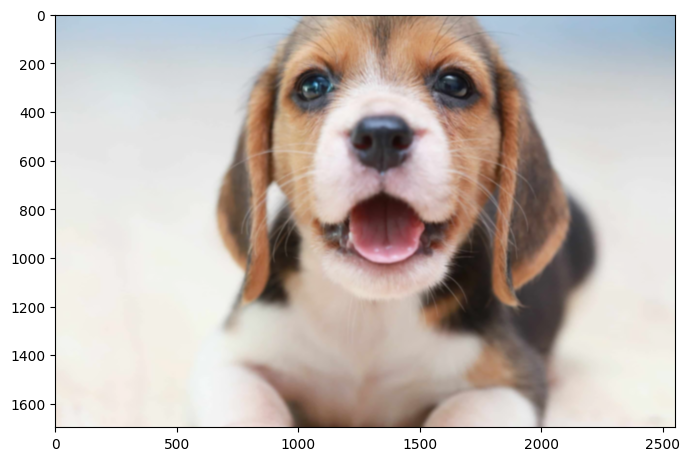

In [22]:
out_img = img_proccess(img, w)
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

## библиотека scipy.signal

In [23]:
import scipy.signal

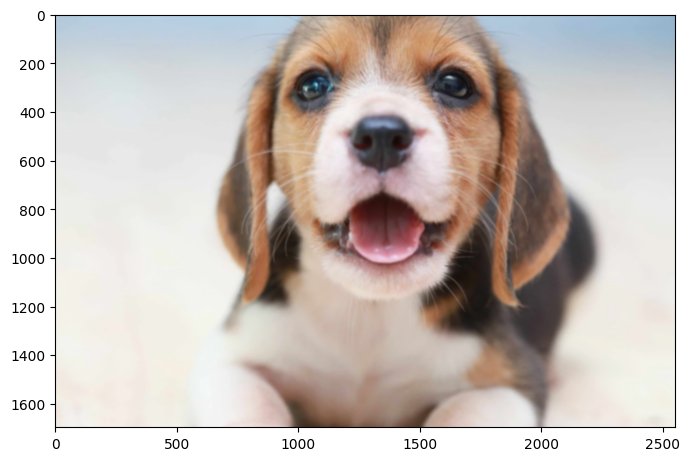

In [24]:
out_img = []

for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))

out_img = np.stack(out_img, axis=2)

plt.figure(figsize=(8, 8))
plt.imshow(out_img)

## Выделение вертикальных и горизонтальных линий

In [25]:
vertical_lines = np.array([[-1,-1,-1],
                           [ 0, 0, 0],
                           [ 1, 1, 1]])

horizontal_lines = np.array([[-1,0,1],
                             [-1,0,1],
                             [-1,0,1]]) 

# # Применим их к нашему изображению.
# img_border_horisont = img_mask(img, vertical_lines) 
# img_border_vert = img_mask(img, horizontal_lines)  

In [26]:
img_horizont = []
img_vertical = []

for c in range(3):
    img_horizont.append(scipy.signal.correlate2d(img[:,:,c], vertical_lines, mode='valid'))
    img_vertical.append(scipy.signal.correlate2d(img[:,:,c], horizontal_lines, mode='valid'))

img_horizont = np.stack(img_horizont, axis=2)
img_vertical = np.stack(img_vertical, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


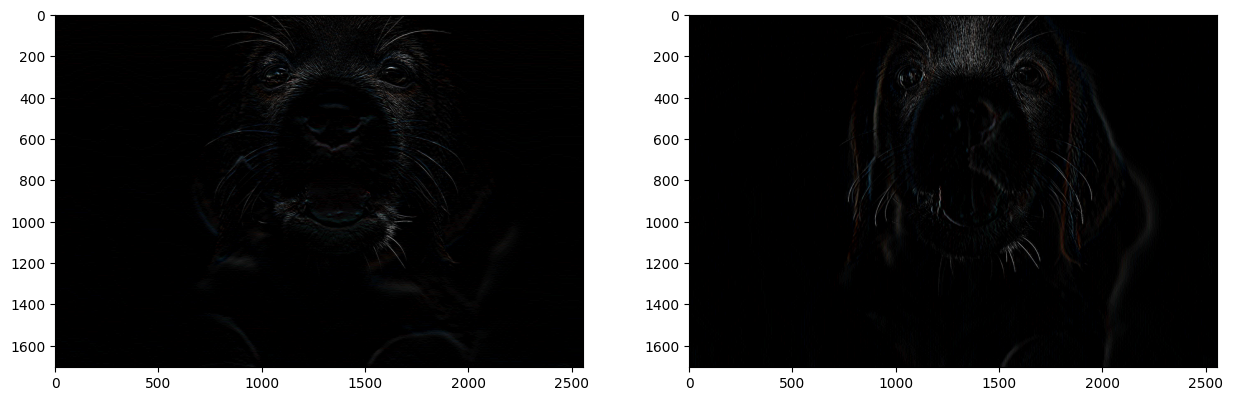

In [27]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax[0].imshow(img_horizont)
ax[1].imshow(img_vertical)
plt.show()

## Объединение изображений с вертикальными и горизонтальными линиями

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


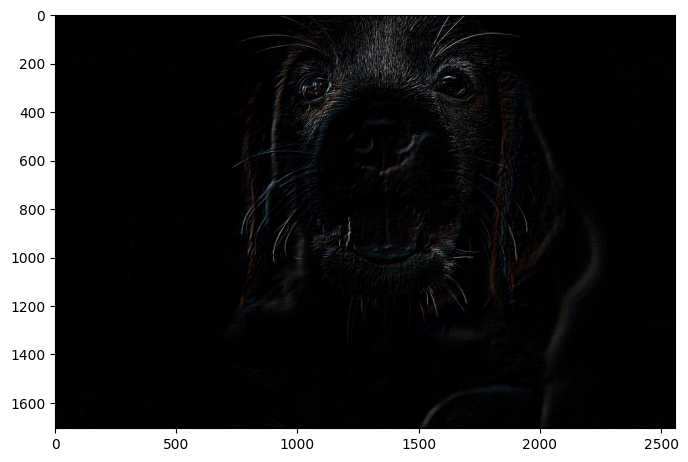

In [28]:
img_lines = img_horizont+img_vertical
plt.figure(figsize=(8, 8))
plt.imshow(img_lines)
plt.show()